# InstaBot - Part 2

In [358]:
# importing all the libraries 
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from collections import OrderedDict
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC


In [359]:
# initializing the webdriver browser 
# you can set the executable path of your chrome_driver underneath
driver = webdriver.Chrome()
driver.maximize_window()

The version of chrome cannot be detected. Trying with latest driver version


In [361]:
# initializing a get request to the browser for Instagram.com
driver.get('https://www.instagram.com/')

In [360]:
# update your username and password for log in 
username = 'shirpure1998'
password = 'Shirpure1998@'

In [362]:
# initializing object for WebDriverWait
wait = WebDriverWait(driver, 15)

In [363]:
#this function lets you login in your Instagram handle
def LogIn(username, password):
    try :
        #locating the username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,"username")))
        #making sure that user name input box is clear
        user_name.clear()
        time.sleep(1)
        user_name.send_keys(username)
        #locating the password textbox and sending password
        pwd = driver.find_element(By.NAME,"password")
        #making sure that password input box is clear
        pwd.clear()
        time.sleep(1)
        pwd.send_keys(password)
        #locating login button
        button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"button[type = 'submit']")))
        button.submit()
        #Save Your Login Info? : Not Now
        pop1 = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(text(),"Not Now")]')))
        pop1.click()
        #notification Turn on or Not
        pop2 = wait.until(EC.presence_of_element_located((By.XPATH,"//button[contains(@class,'_a9--')]")))
        pop2.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [364]:
#call the function to Log in to your Instagram Handle
#change the login credentials above if you want to login in some different instagram handle
LogIn(username,password)

In [365]:
#this function lets you search a profile and open it
def search_opening_profiles(value):
    driver.refresh()
    time.sleep(1)
    try :
        #notification Turn on or Not
        pop2 = driver.find_element(By.XPATH,"//button[contains(@class,'_a9--')]")
        pop2.click()
    except ElementClickInterceptedException:
        pass        
    except TimeoutException:
        pass
    except NoSuchElementException:
        pass
    try:
        #locating the search box and cliking on it
        search_box = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'svg[aria-label="Search"]')))
        search_box.click() 
        time.sleep(1)
        #sending the value in the search box
        sending_value = driver.find_element(By.CSS_SELECTOR,'input[aria-label = "Search input"]')
        sending_value.clear()
        sending_value.send_keys(value)
        time.sleep(2)
        #waiting till the searched is done
        wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'x6s0dn4')]/div/a")))
        time.sleep(1)
        #retry mechanism for StaleElementReferenceException
        for i in range(3):
            try:
                #finding the searched account and clicking on it.
                account = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'x6s0dn4')]/div/a")))
                account.click()
                break
            except StaleElementReferenceException: 
                continue
        #after done searching it will remove the search bar and gives you the full page of that Instagram handler.
        try:
            wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_aawn')]")))
            wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aa_y")]'))).click() 
            time.sleep(2)
        except NoSuchElementException:
            pass
    except ElementClickInterceptedException:
        close = driver.find_element(By.CSS_SELECTOR,"svg[aria-label='Close']")
        close.click()
        print("Try Again")  
        print("Something Went Wrong!")     
    except TimeoutException:
        print("No Search Found!")

In [366]:
#this function lets you search for accounts, and it returns the list of all accounts.
def search(value):
    try:
        #locating the search box and cliking on it
        search_box = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'svg[aria-label="Search"]')))
        search_box.click()
        #sending the value in the search box
        sending_value = driver.find_element(By.CSS_SELECTOR,'input[aria-label = "Search input"]')
        sending_value.clear()
        sending_value.send_keys(value)
        # waiting till all search is done.
        time.sleep(2)
        #locating and extracting all the search handles. 
        handling_names = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//a[contains(@class,'x1i10hfl')]")))
        names = []
        for i in handling_names:
            try:
                if i.text and i.text[0] != "#":
                    names.append(i.text.split("\n")[0])
            except StaleElementReferenceException:
                 handling_names = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"div[role = 'none']")))        
        #clearing the search bar
        driver.find_element(By.CSS_SELECTOR,'div[aria-label = "Clear the search box"]').click()
        #clicking on the search bar again so that it can close.
        search_box = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'svg[aria-label="Search"]')))
        search_box.click()
        return names
    except TimeoutException:
        print("No Search Found!")

### Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.    
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers  
2.Now Find the number of posts these handles have done in the previous 3 days.  
3.Depict this information using a suitable graph.  

In [367]:
#First 10 handles from part-1
result = search("food")
first_10_handles = result[:10]
first_10_handles

['mumbaifoodjunkie',
 'food_lunatic',
 'foodiesfood_court',
 'foodgod',
 'tasty_foodgram_in',
 'fun2ooshfood',
 'food',
 'foodie_incarnate',
 'foodtalkindia',
 'delhifoodwalks']

In [368]:
#this function helps you get the top 5 Insta Handles
def top_5_handles(first_10_handles):
    try:
        #locating the search box and cliking on it
        search_box = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'svg[aria-label="Search"]')))
        search_box.click() 
        #an empty dictionary to store the values
        top_5 = {}
        #loop for opening profile and taking out the followers numbers and appending it into the empty dictionary.
        for i in first_10_handles: 
            #calling function to open profiles
            search_opening_profiles(i)
            # waiting till all search is done.
            time.sleep(2)
            #locating and getting the number of followers.
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_ac2a")))[1]
            #appending the key value pair in top_5
            top_5[i] = int(followers.get_attribute("title").replace(",",""))
            count = 0
            new_result = {}
            #sorting the dictionary on basis of there followers using sorted function
            for i in sorted(top_5 , key=top_5.get, reverse=True):
                new_result[i] = top_5[i]
                count = count + 1
                if count == 5:
                    break            
        return new_result
    except TimeoutException:
        print("Something went wrong!, Try Again")

In [369]:
#calling the top_5_handles function and storing the value in the result variable
result = top_5_handles(first_10_handles)
print('Top 5 instagram handles which have the highest number of followers')
for key,value in result.items():
    print(key,":",value)

Top 5 instagram handles which have the highest number of followers
foodgod : 3895930
foodie_incarnate : 1623710
foodiesfood_court : 846167
foodtalkindia : 309685
delhifoodwalks : 195313


##### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [370]:
#this function let you know the number of post the user post in given days.
def number_of_post(day):
    try:
        #finding the first post and clicking on it.
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_aagw")))
        post.click()
        time.sleep(1)
        #running a loop for comparing and counting the number of posts the user post in given days.
        count = 0
        while True:
            #locating the date
            temp = wait.until(EC.presence_of_element_located((By.XPATH,"//time[contains(@class,'_a9ze')]")))
            time.sleep(1)
            #getting the date in string fromat
            date_string = temp.get_attribute("datetime")
            #format code of given date
            format_code = "%Y-%m-%dT%H:%M:%S"
            #parsing the date in datetime and converting it into date format.
            date = datetime.strptime(date_string[:19],format_code)
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day:
                break
            else:
                count = count + 1
            #locating the next_post button and clicking on it
            next_post = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"svg[aria-label='Next']")))
            next_post.click()
            time.sleep(2)
        # after done fetching the data closing the post section completely.
        close = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"svg[aria-label='Close']")))
        close.click()
        return count
    except ElementClickInterceptedException:
        driver.refresh()
        print("Try Again Please!")
    except TimeoutException:
        print("Something Went Wrong!, Try Again")

In [371]:
#calling the function to get the result
#empty dict to store the data
total_post_count = {}
#loop to open all profile and get the required data.
for i in result:
    search_opening_profiles(i)
    time.sleep(3)
    count = number_of_post(3)
    total_post_count[i] = count
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,":",total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodgod : 0
foodie_incarnate : 1
foodiesfood_court : 4
foodtalkindia : 4
delhifoodwalks : 4


##### 3.Depict this information using a suitable graph.

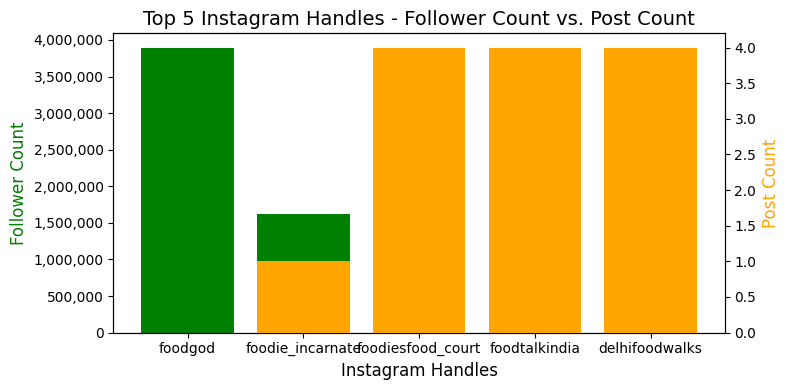

In [372]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sample data (replace with your actual data)
instagram_handles = result.keys()
follower_counts = result.values()
post_counts = total_post_count.values()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot follower counts as a bar graph on the left y-axis
ax1.bar(range(1, len(instagram_handles) + 1), follower_counts, color='green')
ax1.set_ylabel('Follower Count', color='green')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis on the right for post counts
ax2 = ax1.twinx()

# Plot post counts as a bar graph on the right y-axis
# Plot post counts as a bar graph on the right y-axis without transparency
ax2.bar(range(1, len(instagram_handles) + 1), post_counts, color='orange')
ax2.set_ylabel('Post Count', color='orange')
ax2.tick_params(axis='y', labelcolor='black')

# Set the title and labels
plt.title('Top 5 Instagram Handles - Follower Count vs. Post Count')
plt.xlabel('Instagram Handles')

# Format the x-axis ticks to start from 1 and increment by 1
plt.xticks(range(1, len(instagram_handles) + 1), instagram_handles, rotation=45, ha='right')

# Format the y-axis labels to show accurate follower counts
def format_follower_count(x, pos):
    return f'{int(x):,}'  # Format the number with commas as thousands separators

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_follower_count))

# Set font size for x and y axis labels and the title
ax1.set_xlabel('Instagram Handles', fontsize=12)
ax1.set_ylabel('Follower Count', color='green', fontsize=12)
ax2.set_ylabel('Post Count', color='orange', fontsize=12)
plt.title('Top 5 Instagram Handles - Follower Count vs. Post Count', fontsize=14)

# Add some padding to the plot
plt.tight_layout()

# Show the plot
plt.show()



### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.  
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.  
3.Create a csv file with two columns : the word and its frequency  
4.Now, find the hashtags that were most popular among these bloggers  
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.  

In [392]:
def extract_content(lst):
    try:
        hashtag_lists = []
        for user in lst:
            search_opening_profiles(user)
            #rendering post with the help of scrollTo
            driver.execute_script('window.scrollBy(0, 6000);')   
            time.sleep(1)
            #going upwards using scrollTo
            driver.execute_script('window.scrollBy(0, -9000);')
            time.sleep(1)
            #finding the first post and clicking on it.
            posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagw")))
            for post in posts[:10]:
                try:
                    post.click()
                    time.sleep(2)
                    hashtags = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//div[contains(@class,'_a9zs')]/h1/a")))
                    for hashtag in hashtags:
                        if hashtag.text != '':
                            if hashtag.text[0] == "#":
                                hashtag_lists.append(hashtag.text)
                    # after done fetching the data closing the post section completely.
                    close = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"svg[aria-label='Close']")))
                    close.click()
                    time.sleep(2)
                except TimeoutException:                    
                    # after done fetching the data closing the post section completely.
                    close = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"svg[aria-label='Close']")))
                    close.click()
                    time.sleep(2)  
        return hashtag_lists    
    except TimeoutException:
        print("Something Went Wrong! Try Again")

In [393]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)
print(hashtags)

['#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#rosé', '#gulkand', '#explore', '#foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#kashmir', '#srinagar', '#Wendys', '#WendysBurgers', '#YummyBurgers', '#GreatDeal', '#foodieincarnate', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#chai', '#tea', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#icecream', '#explore', '#orange', '#foodieincarnate', '#foodieincarnaterecommends', '#Foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#baklava', '#desserts', '#turkish', '#viralvideos', '#viralfood', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reels', '#reelsinstagram', '#foodfactory', '#streetfood', '#chakna', '#explore', '#foodieincarnate', '#foodieincarnaterecommends', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reels

##### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [396]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,":",dct[i])

#explore : 13
#reelsinstagram : 12
#reels : 12
#easyrecipes : 10
#foodtalkindia : 10
#delicious : 10
#yummy : 10
#discover : 10
#foodieincarnate : 9
#foodiesfood_court : 9
#food : 9
#reelitfeelit : 8
#reelkarofeelkaro : 8
#flavours : 8
#recipes : 7
#explorepage : 7
#trending : 7
#paneerrecipes : 7
#indianrecipes : 6
#delhi : 6
#viralvideos : 5
#streetfood : 5
#recipeoftheday : 5
#vegrecipes : 5
#weekend : 4
#desikhana : 4
#drinks : 4
#snacks : 3
#quickrecipes : 3
#delhifoodblogger : 3
#indianfood : 3
#NewInTown : 3
#delhincr : 3
#Reelitfeelit : 2
#foodieincarnaterecommends : 2
#chakna : 2
#recipereels : 2
#delhifood : 2
#instagram : 2
#foodvideos : 2
#paneertikka : 2
#eveningsnacks : 2
#garlicbread : 2
#pizza : 2
#mumbai : 2
#dfwinmanipur : 2
#karolbagh : 2
#walkwithanubhav : 2
#dfwinchikhaldara : 2
#foodwalkswithanubhav : 2
#rosé : 1
#gulkand : 1
#kashmir : 1
#srinagar : 1
#Wendys : 1
#WendysBurgers : 1
#YummyBurgers : 1
#GreatDeal : 1
#chai : 1
#tea : 1
#icecream : 1
#orange : 1
#Foo

##### 3.Create a csv file with two columns : the word and its frequency

In [397]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#explore,13
1,#reelsinstagram,12
2,#reels,12
3,#easyrecipes,10
4,#foodtalkindia,10
5,#delicious,10
6,#yummy,10
7,#discover,10
8,#foodieincarnate,9
9,#foodiesfood_court,9


##### 4.Now, find the hashtags that were most popular among these bloggers

In [400]:
print(words_list[0][0])

#explore


##### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [403]:
words_list[0][0]

'#explore'

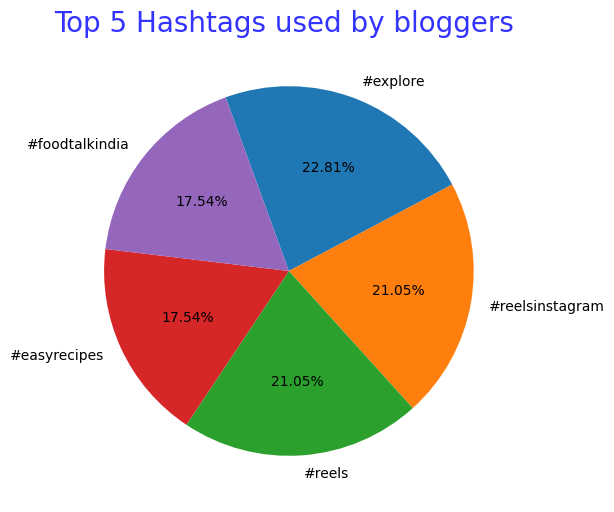

In [408]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='blue',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:  
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.  
2.Calculate the average likes for a handle.  
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.  
4.Create a bar graph to depict the above obtained information.  

##### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [ ]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
        likes = []
        #This fuction will search a user and open that profile
        search_opening_profiles(user)
        time.sleep(2)
        #just for scrolling
        driver.execute_script('window.scrollTo(0, 3000);')
        time.sleep(2)
        driver.execute_script('window.scrollTo(0, -3000);')
        time.sleep(2)
        #locating the post of the user
        posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagw")))
        for post in posts[:10]:
            views = wait.until(EC.presence_of_element_located((By.XPATH,"//span[contains(@class,'x193iq5q')]")))
    except TimeoutException:
        print("Something Went Wrong! Try Again")

In [421]:
views = wait.until(EC.presence_of_element_located((By.XPATH,"//span[contains(@class,'x193iq5w')]")))
views

<selenium.webdriver.remote.webelement.WebElement (session="7fba0331d419fe4c5f7cddf74a36df78", element="3D9E075F38055F2615404DB74E045B53_element_2770")>